<a href="https://colab.research.google.com/github/Ravikiran2611/opencv/blob/master/hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
  !curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [245]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [0]:
 path =  Path('gdrive/My Drive/Colab Notebooks')

In [0]:
import csv
texts = []
labels = []
with open(path/"SubtaskB_Trial_Test_Labeled.csv",errors ='ignore', encoding='utf-8' ) as csv_file:
  csv_reader  = csv.reader(csv_file,delimiter = ',')
  for row in csv_reader:
     _,text,label = row[0],row[1],row[2]
     texts.append(text), labels.append(label)
texts = texts[1:]
labels = labels[1:]

extratexts = []

with open('gdrive/My Drive/Colab Notebooks/help.csv' ,errors='ignore', encoding='utf-8') as textfile:
  reader = csv.reader(textfile, delimiter =',')
  for row in reader:
    extratexts.append(row)
 

 

In [0]:
data = {'sentence':texts,'labels':labels}
extratexts.append(texts)
dataextra = {'sentence':extratexts}

In [0]:
df =pd.DataFrame(data)
dfextra = pd.DataFrame(dataextra)

In [252]:
dfextra.iloc[90]

sentence    [Credit the fact that it is owned and operated...
Name: 90, dtype: object

In [0]:
data_lm = TextList.from_df(dfextra,path,cols=0).split_by_rand_pct(0.1).label_for_lm().databunch(bs =64)

In [254]:
data_lm

TextLMDataBunch;

Train: LabelList (4306 items)
x: LMTextList
xxbos [ ' xxmaj check out some pictures i took of my xxunk after they got done .. ' ],xxbos [ ' xxmaj we had a pretty darn good time . ' ],xxbos [ ' xxmaj great food ' , ' superior service ' , ' gorgeous decor ... i had a xxmaj breakfast xxmaj xxunk and a generous side of xxmaj cheesy xxmaj grits . ' ],xxbos [ ' xxmaj xxunk . ' ],xxbos [ ' xxmaj my favorite dish so far is the spicy noodles . ' ]
y: LMLabelList
,,,,
Path: gdrive/My Drive/Colab Notebooks;

Valid: LabelList (478 items)
x: LMTextList
xxbos [ ' xxmaj they usually are . ' ],xxbos [ ' xxmaj they offered some sort of xxunk xxunk to xxunk some of the $ 30 xxunk up ' , ' but it all seemed more than xxunk in xxunk so we decided to park elsewhere . ' ],xxbos [ ' xxmaj the room was not ready when we got there so we got a xxunk which was supposed to be an upgrade with a xxunk private patio . ' ],xxbos [ ' xxmaj xxunk constantly goes up ' , ' even for those of us that have

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3,metrics = accuracy)

In [256]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


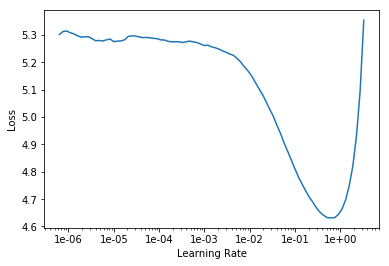

In [257]:
learn.recorder.plot()

In [259]:
learn.fit_one_cycle(1,1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,3.207766,3.178495,0.417262,00:04


In [0]:
learn.unfreeze()

In [261]:
learn.fit_one_cycle(1,slice(1e-03,1e-01))

epoch,train_loss,valid_loss,accuracy,time
0,3.160546,3.095651,0.422842,00:06


In [0]:
learn.save_encoder("fine tuned reverse")

In [0]:
# data_class = TextList.from_csv(path,'hotel.csv')
data_clas = (TextList.from_csv(path,'hotel.csv', vocab=data_lm.vocab, cols = 1).split_by_rand_pct(0.2).label_from_df(cols = 2).databunch(bs =64))


In [0]:
learnclassifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics = [accuracy , FBeta('micro')])
learnclassifier.load_encoder('fine tuned reverse')

In [292]:
learnclassifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


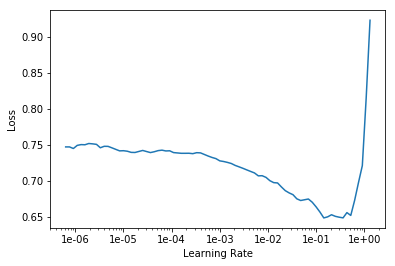

In [293]:
learnclassifier.recorder.plot()

In [298]:
learnclassifier.fit_one_cycle(1,8e-02)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.488416,0.423574,0.808711,0.808711,00:06


In [297]:
learnclassifier.fit_one_cycle(1,1e-01)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.490275,0.420308,0.819305,0.819305,00:06


In [0]:
learnclassifier.save('suggestion classifier 85')

In [0]:
data_c1 = (TextList.from_csv(path,'SubtaskA_EvaluationData_labeled.csv', vocab=data_lm.vocab, cols = 1).split_by_rand_pct(0.1).label_from_df(cols = 2).databunch(bs =64))


In [0]:
data_c = (TextList.from_csv(path,'SubtaskB_EvaluationData_labeled.csv', vocab=data_lm.vocab, cols = 1).split_by_rand_pct(0.1).label_from_df(cols = 2).databunch(bs =64))


In [301]:
# learnclassifier.load('suggestion classifier 85')
learnclassifier.validate(data_c1.train_dl)

[0.3609092, tensor(0.8665), tensor(0.8665)]

In [302]:
learnclassifier.validate(data_c.train_dl)

[0.6699175, tensor(0.6307), tensor(0.6307)]